<a href="https://colab.research.google.com/github/41123222009/20P03519-Tugas-Kelompok-4/blob/main/ML_Kelompok_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Kelompok 4**

In [321]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, f1_score, classification_report,
                             confusion_matrix, roc_curve, auc)

sns.set_style("whitegrid")

## **1. Eksplorasi Data**

### Load Dataset

In [322]:
df = pd.read_csv('https://raw.githubusercontent.com/41123222009/20P03519-Tugas-Kelompok-4/refs/heads/main/ckd-dataset-v2.csv')
df

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,age
0,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,4.46 - 5.05,7360 - 9740,0,0,0,0,0,0,≥ 227.944,< 12
1,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,4.46 - 5.05,12120 - 14500,0,0,0,0,0,0,≥ 227.944,< 12
2,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,4.46 - 5.05,14500 - 16880,0,0,0,1,0,0,127.281 - 152.446,< 12
3,1,1,1.009 - 1.011,3 - 3,ckd,0,< 0,0,0,0,...,4.46 - 5.05,7360 - 9740,0,0,0,0,0,0,127.281 - 152.446,< 12
4,0,0,1.015 - 1.017,< 0,ckd,0,< 0,0,0,0,...,5.05 - 5.64,7360 - 9740,0,1,0,1,1,0,127.281 - 152.446,12 - 20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,2,1.019 - 1.021,< 0,ckd,0,< 0,0,0,0,...,4.46 - 5.05,7360 - 9740,1,1,0,0,0,1,26.6175 - 51.7832,≥ 74
196,0,0,1.019 - 1.021,< 0,ckd,0,< 0,0,0,0,...,4.46 - 5.05,7360 - 9740,0,1,0,0,0,1,< 26.6175,≥ 74
197,1,1,≥ 1.023,< 0,notckd,0,< 0,0,0,0,...,6.23 - 6.82,7360 - 9740,0,0,0,0,0,0,51.7832 - 76.949,≥ 74
198,1,1,≥ 1.023,< 0,notckd,0,< 0,0,0,0,...,4.46 - 5.05,4980 - 7360,0,0,0,0,0,0,102.115 - 127.281,≥ 74


### Identifikasi Data

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bp (Diastolic)  200 non-null    int64 
 1   bp limit        200 non-null    int64 
 2   sg              200 non-null    object
 3   al              200 non-null    object
 4   class           200 non-null    object
 5   rbc             200 non-null    int64 
 6   su              200 non-null    object
 7   pc              200 non-null    int64 
 8   pcc             200 non-null    int64 
 9   ba              200 non-null    int64 
 10  bgr             200 non-null    object
 11  bu              200 non-null    object
 12  sod             200 non-null    object
 13  sc              200 non-null    object
 14  pot             200 non-null    object
 15  hemo            200 non-null    object
 16  pcv             200 non-null    object
 17  rbcc            200 non-null    object
 18  wbcc      

Dataset `ckd-dataset-v2.csv` berisi data mengenai pasien yang diduga mengalami Chronic Kidney Disease (CKD), dengan total 200 entri dan 27 kolom. Berikut adalah deskripsi setiap kolom:

1. `bp (Diastolic)` (*int64*) - Tekanan darah diastolik pasien, dikodekan sebagai 0 (normal) dan 1 (tinggi).  
2. `bp limit` (*int64*) - Indikator apakah tekanan darah melewati batas normal.  
3. `sg` (*object*) - Nilai berat jenis urin dalam bentuk interval (misalnya, "1.009 - 1.011").  
4. `al` (*object*) - Tingkat albumin dalam urin, bisa berupa nilai seperti `< 0`, `≥ 4`, dll.  
5. `class` (*object*) - Kategori status CKD: `ckd` (terkena) atau `notckd` (tidak terkena).  
6. `rbc` (*int64*) - Sel darah merah dalam urin: 0 (normal), 1 (tidak normal).  
7. `su` (*object*) - Kadar gula dalam urin, dalam format teks seperti `< 0`.  
8. `pc` (*int64*) - Jumlah sel nanah (pus cells) dalam urin: 0 (tidak ada), 1 (ada).  
9. `pcc` (*int64*) - Gumpalan sel nanah: 0 (tidak ada), 1 (ada).  
10. `ba` (*int64*) - Kehadiran bakteri dalam urin: 0 (tidak), 1 (ada).  
11. `bgr` (*object*) - Kadar glukosa dalam darah (bentuk rentang nilai sebagai teks).  
12. `bu` (*object*) - Kadar urea dalam darah, dicatat dalam format teks numerik.  
13. `sod` (*object*) - Kadar natrium dalam darah, dalam bentuk teks angka.  
14. `sc` (*object*) - Kadar kreatinin dalam serum, nilai berbentuk string angka.  
15. `pot` (*object*) - Kadar kalium dalam darah.  
16. `hemo` (*object*) - Tingkat hemoglobin pasien.  
17. `pcv` (*object*) - Volume sel darah yang dipadatkan, dalam bentuk teks numerik.  
18. `rbcc` (*object*) - Jumlah sel darah merah, juga dicatat sebagai teks numerik.  
19. `wbcc` (*object*) - Jumlah sel darah putih dalam darah pasien.  
20. `htn` (*int64*) - Status hipertensi: 0 (tidak), 1 (ya).  
21. `dm` (*int64*) - Status diabetes: 0 (tidak), 1 (ya).  
22. `cad` (*int64*) - Riwayat penyakit jantung koroner: 0 (tidak), 1 (ya).  
23. `appet` (*int64*) - Nafsu makan: 0 (baik), 1 (buruk).  
24. `pe` (*int64*) - Pembengkakan (edema): 0 (tidak), 1 (ya).  
25. `ane` (*int64*) - Anemia: 0 (tidak), 1 (ya).  
26. `grf` (*object*) - Laju filtrasi glomerulus (GFR), dalam interval nilai sebagai teks.  
27. `age` (*object*) - Kelompok usia pasien, misalnya `< 12`, `12 - 20`, dst.

### Identifikasi Missing Value

In [324]:
print(df.isnull().sum())

bp (Diastolic)    0
bp limit          0
sg                0
al                0
class             0
rbc               0
su                0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sod               0
sc                0
pot               0
hemo              0
pcv               0
rbcc              0
wbcc              0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
grf               0
age               0
dtype: int64


Berdasarkan output yang ditampilkan, hasil dari perintah `df.isnull().sum()` menunjukkan bahwa tidak ada nilai yang hilang (missing values) dalam dataset. Ini berarti dataset bersih dan tidak memerlukan penanganan tambahan untuk mengatasi missing values.

### Visualisasi Data

#### A. Distiribusi Kelompok Usia berdasarkan Status CKD

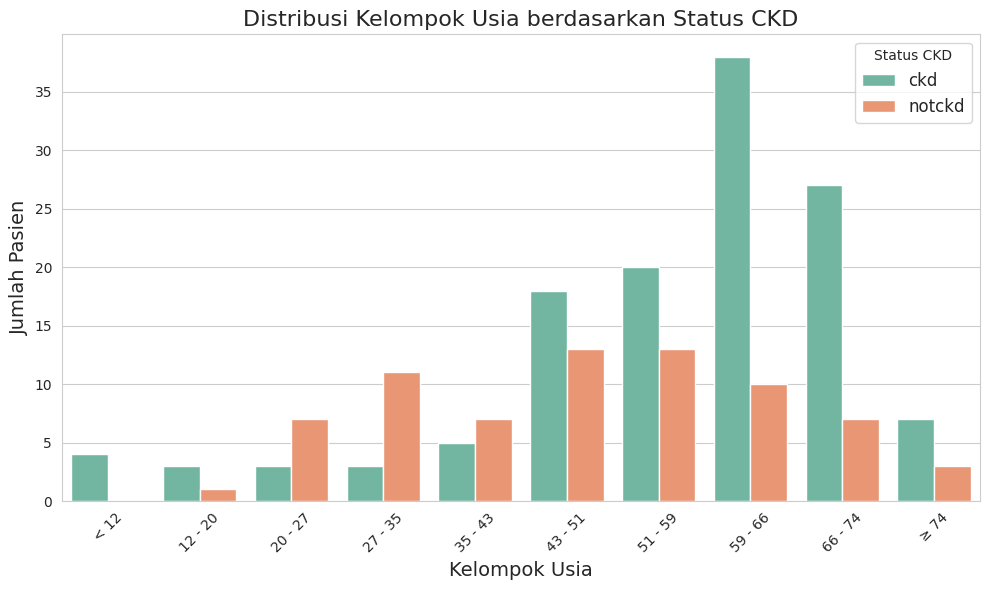

In [325]:
df_viz = df.copy()
plt.figure(figsize=(10, 6))
sns.countplot(data=df_viz, x='age', hue='class', palette='Set2')
plt.title('Distribusi Kelompok Usia berdasarkan Status CKD', fontsize=16)
plt.xlabel('Kelompok Usia', fontsize=14)
plt.ylabel('Jumlah Pasien', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Status CKD', fontsize=12)
plt.tight_layout()
plt.show()

Grafik tersebut menunjukkan distribusi kelompok usia pasien berdasarkan status penyakit ginjal kronis (CKD). Dari grafik ini terlihat bahwa jumlah pasien dengan CKD (ditandai dengan batang berwarna hijau) cenderung meningkat seiring bertambahnya usia. Peningkatan yang signifikan mulai terlihat pada kelompok usia 43–51 tahun dan mencapai puncaknya pada kelompok usia 59–66 tahun. Setelah itu, meskipun sedikit menurun, jumlah pasien CKD tetap tinggi pada kelompok usia 66–74 tahun. Sementara itu, pasien tanpa CKD (ditandai dengan batang berwarna oranye) lebih banyak ditemukan pada kelompok usia yang lebih muda, terutama pada rentang usia 27–35 tahun. Jumlah pasien non-CKD kemudian menurun secara bertahap pada kelompok usia yang lebih tua. Berdasarkan pola ini, dapat disimpulkan bahwa CKD lebih umum terjadi pada individu dengan usia lanjut, sedangkan individu yang lebih muda cenderung tidak menderita CKD. Distribusi ini mencerminkan pentingnya perhatian dan pencegahan CKD pada kelompok usia menengah ke atas.

#### B. Distribusi CKD berdasarkan Kombinasi Risiko (Hipertensi, Diabetes, CAD)

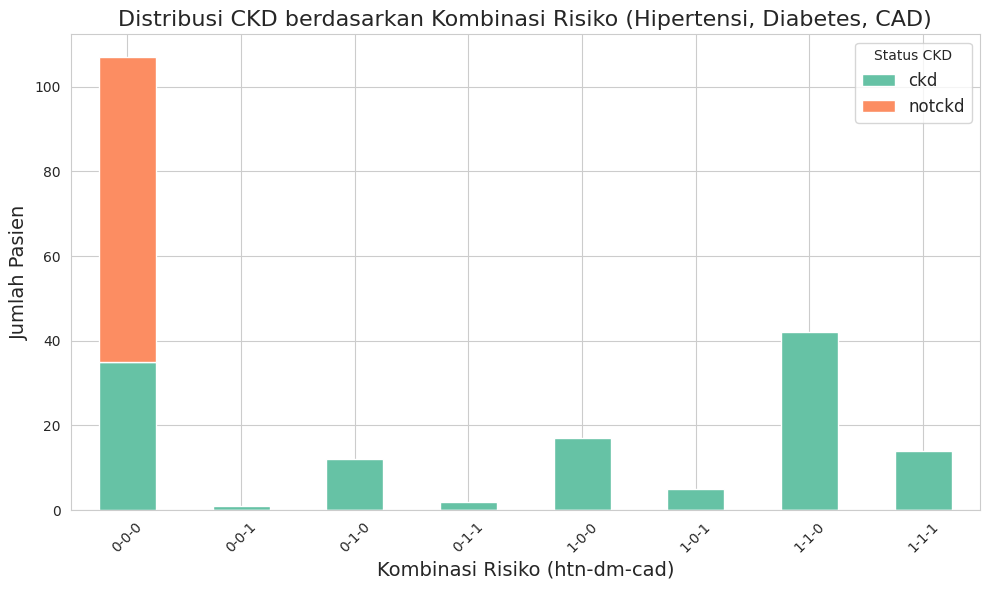

In [326]:
df_viz['htn'] = pd.to_numeric(df_viz['htn'], errors='coerce')
df_viz['dm'] = pd.to_numeric(df_viz['dm'], errors='coerce')
df_viz['cad'] = pd.to_numeric(df_viz['cad'], errors='coerce')
df_viz['risk_combo'] = df_viz[['htn', 'dm', 'cad']].astype(str).agg('-'.join, axis=1)
risk_counts = df_viz.groupby(['risk_combo', 'class']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
risk_counts.plot(kind='bar', stacked=True, ax=plt.gca(), color=['#66c2a5', '#fc8d62'])
plt.title('Distribusi CKD berdasarkan Kombinasi Risiko (Hipertensi, Diabetes, CAD)', fontsize=16)
plt.xlabel('Kombinasi Risiko (htn-dm-cad)', fontsize=14)
plt.ylabel('Jumlah Pasien', fontsize=14)
plt.legend(title='Status CKD', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Grafik tersebut menunjukkan distribusi penyakit ginjal kronis (CKD) berdasarkan kombinasi faktor risiko yaitu hipertensi (htn), diabetes (dm), dan penyakit jantung koroner (CAD). Sumbu X menunjukkan berbagai kombinasi risiko dalam format biner (`0` untuk tidak memiliki risiko, `1` untuk memiliki risiko), misalnya `0-0-0` berarti pasien tidak memiliki ketiga risiko, sedangkan `1-1-0` berarti pasien memiliki hipertensi dan diabetes, tetapi tidak memiliki CAD. Sumbu Y menunjukkan jumlah pasien dalam setiap kategori kombinasi risiko, dengan warna hijau untuk pasien CKD dan oranye untuk pasien non-CKD.

Dari grafik ini terlihat bahwa jumlah pasien terbanyak berada pada kombinasi risiko `0-0-0`, yang berarti tidak memiliki hipertensi, diabetes, maupun CAD. Namun, sebagian besar dari mereka adalah pasien non-CKD. Sebaliknya, pada kombinasi risiko tertentu seperti `1-1-0` (hipertensi dan diabetes) dan `1-0-0` (hanya hipertensi), jumlah pasien CKD meningkat secara signifikan. Ini menunjukkan bahwa keberadaan hipertensi dan diabetes, terutama jika digabungkan, sangat berpengaruh terhadap risiko CKD. Sementara kombinasi seperti `0-1-0`, `0-0-1`, dan `0-1-1` menunjukkan jumlah pasien yang lebih sedikit secara keseluruhan, tetapi sebagian besar dari mereka adalah penderita CKD.

Secara keseluruhan, grafik ini memperlihatkan bahwa CKD lebih umum terjadi pada pasien dengan satu atau lebih faktor risiko, khususnya hipertensi dan diabetes. Semakin banyak faktor risiko yang dimiliki, semakin tinggi pula kemungkinan seseorang menderita CKD. Temuan ini mempertegas pentingnya deteksi dan manajemen dini terhadap hipertensi dan diabetes untuk mencegah terjadinya CKD.

#### C. Distribusi Gejala Klinis pada Pasien CKD

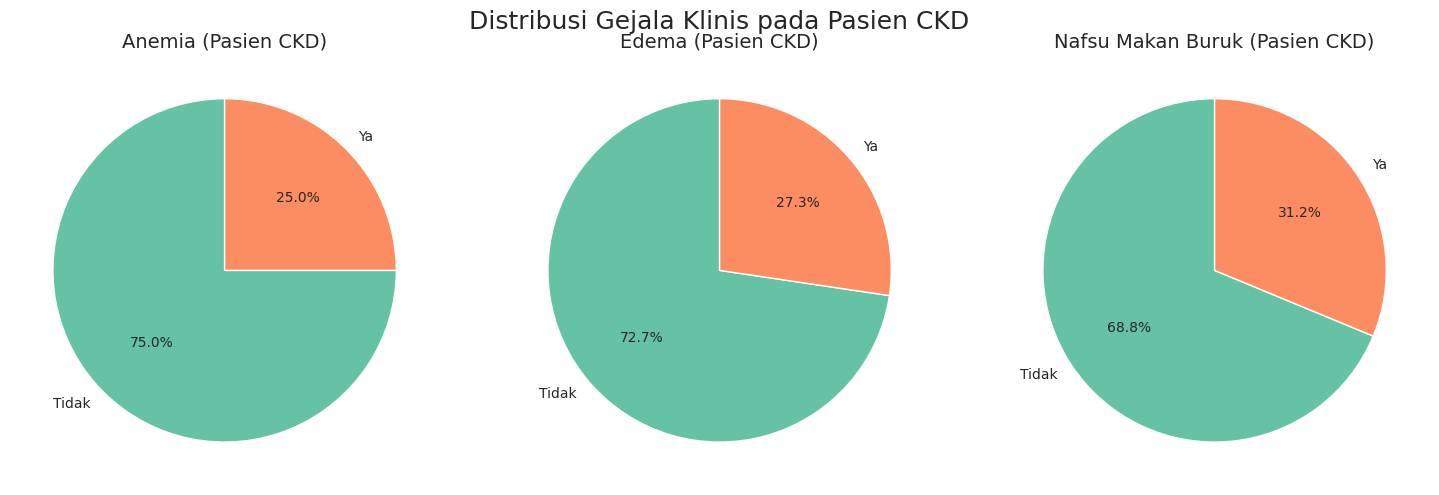

In [327]:
df_ckd = df[df['class'] == 'ckd']
comorbidities = {
    'ane': 'Anemia',
    'pe': 'Edema',
    'appet': 'Nafsu Makan Buruk'
}

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, (col, title) in zip(axes, comorbidities.items()):
    counts = df_ckd[col].value_counts().sort_index()
    labels = ['Tidak', 'Ya']
    ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
    ax.set_title(f'{title} (Pasien CKD)', fontsize=14)

plt.suptitle('Distribusi Gejala Klinis pada Pasien CKD', fontsize=18)
plt.tight_layout()
plt.show()

Gambar tersebut menunjukkan distribusi gejala klinis pada pasien dengan penyakit ginjal kronis (CKD) dalam bentuk tiga diagram lingkaran. Gejala yang ditampilkan meliputi anemia, edema (pembengkakan), dan nafsu makan buruk. Dari diagram pertama, diketahui bahwa sebanyak 75% pasien CKD tidak mengalami anemia, sementara 25% sisanya mengalami gejala tersebut. Pada gejala edema, 72,7% pasien tidak mengalaminya, sedangkan 27,3% mengalami edema. Sementara itu, pada gejala nafsu makan buruk, tercatat 68,8% pasien tidak mengalami gangguan ini, dan 31,2% pasien mengalaminya. Berdasarkan data ini, dapat disimpulkan bahwa sebagian besar pasien CKD tidak menunjukkan gejala-gejala klinis tersebut, namun tetap terdapat proporsi yang signifikan, terutama pada gejala nafsu makan buruk, yang menunjukkan angka tertinggi di antara ketiganya.

## **2. Preprocessing Data**

### Encoding Fitur Kategorikal

In [328]:
label_encoder = preprocessing.LabelEncoder()

df[['sg', 'al', 'class', 'su', 'bgr',
    'bu', 'sod', 'sc', 'pot', 'hemo',
    'pcv', 'rbcc', 'wbcc', 'grf', 'age']] = df[['sg', 'al', 'class', 'su', 'bgr',
                                                'bu', 'sod', 'sc', 'pot', 'hemo',
                                                'pcv', 'rbcc', 'wbcc', 'grf', 'age']].apply(label_encoder.fit_transform)
df

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,age
0,0,0,2,0,0,0,4,0,0,0,...,3,5,0,0,0,0,0,0,10,8
1,0,0,0,3,0,0,4,0,0,0,...,3,0,0,0,0,0,0,0,10,8
2,0,0,0,4,0,1,4,1,0,1,...,3,1,0,0,0,1,0,0,2,8
3,1,1,0,2,0,0,4,0,0,0,...,3,5,0,0,0,0,0,0,2,8
4,0,0,1,3,0,0,4,0,0,0,...,4,5,0,1,0,1,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,2,2,3,0,0,4,0,0,0,...,3,5,1,1,0,0,0,1,6,9
196,0,0,2,3,0,0,4,0,0,0,...,3,5,0,1,0,0,0,1,9,9
197,1,1,4,3,1,0,4,0,0,0,...,6,5,0,0,0,0,0,0,7,9
198,1,1,4,3,1,0,4,0,0,0,...,3,4,0,0,0,0,0,0,1,9


Encoding fitur kategorikal dilakukan menggunakan LabelEncoder dari pustaka `sklearn.preprocessing`. Dalam tahap ini, beberapa kolom yang berisi data kategorikal seperti `'sg'`, `'al'`, `'class'`, `'su'`, `'bgr'`, dan lainnya diubah menjadi format numerik. Proses ini dilakukan dengan menerapkan `LabelEncoder().fit_transform` pada setiap kolom yang bersifat kategorikal. Hasilnya, semua nilai kategorikal dalam DataFrame telah dikonversi menjadi angka, sehingga data siap digunakan untuk proses analisis lebih lanjut atau pemodelan machine learning yang membutuhkan input numerik.

### Data Training & Data Testing

In [329]:
X = df[['bp (Diastolic)', 'bp limit', 'sg', 'al', 'rbc', 'su', 'pc',
       'pcc', 'ba', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc',
       'wbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'grf', 'age']]
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
  )

Pembagian data menjadi data training dan data testing dilakukane menggunakan fungsi `train_test_split` dari pustaka `sklearn.model_selection`. Pertama, fitur-fitur (variabel independen) disimpan dalam variabel `X`, sedangkan label (variabel target) disimpan dalam variabel `y`, yaitu kolom `'class'`. Kemudian, data dibagi menjadi 80% untuk pelatihan (`X_train`, `y_train`) dan 20% untuk pengujian (`X_test`, `y_test`). Parameter `random_state=42` digunakan untuk memastikan hasil pembagian data konsisten setiap kali kode dijalankan. Langkah ini penting agar model dapat dilatih dan dievaluasi secara adil.

## **3. Processing Data**

In [330]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=4),
    'Random Forest': RandomForestClassifier(random_state=4),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'MLP Neural Network': MLPClassifier(max_iter=1000)
}

evaluation_results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Hitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    # Simpan hasil dalam daftar
    evaluation_results.append({
        'Model': model_name,
        'Accuracy': round(accuracy, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1 Score': round(f1, 4)
    })

Proses pelatihan dan evaluasi dilakukan menggunakan beberapa model machine learning, yaitu Logistic Regression, Decision Tree, Random Forest, SVM, KNN, dan MLP Neural Network. Masing-masing model kemudian dilatih menggunakan data training (`X_train`, `y_train`) dan diuji pada data testing (`X_test`). Prediksi hasil model dibandingkan dengan data aktual untuk menghitung metrik evaluasi, yaitu accuracy, precision, recall, dan F1 score. Nilai-nilai ini disimpan dalam sebuah list `evaluation_results` untuk dianalisis lebih lanjut. Proses ini bertujuan untuk membandingkan performa tiap model secara objektif.

## **4. Evaluasi Model**

### Metric Evaluasi Model

In [331]:
# Konversi ke DataFrame
results_df = pd.DataFrame(evaluation_results)

fig = go.Figure(data=[go.Table(
    header=dict(
        values=[f"<b>{col}</b>" for col in results_df.columns],
        fill_color='white',
        line_color='black',
        align='center',
        font=dict(color='black', size=12)
    ),
    cells=dict(
        values=[results_df[col] for col in results_df.columns],
        fill_color='white',
        line_color='black',
        align='center',
        font=dict(color='black', size=12)
    )
)])

fig.update_layout(
    title=dict(
        text="Perbandingan Evaluasi Model Klasifikasi",
        x=0.5,
        xanchor='center',
        font=dict(color='black', size=20)
    ),
    margin=dict(t=30)  # Kurangi jarak atas (judul & tabel)
)

fig.show()

Berdasarkan hasil yang evaluasi, model Random Forest menunjukkan performa terbaik dengan skor sempurna (1,0) di semua metrik evaluasi, yang berarti model ini mampu mengklasifikasikan data uji dengan sangat akurat tanpa kesalahan. Model lain seperti Logistic Regression, SVM, KNN, dan MLP Neural Network memiliki akurasi yang sama sebesar 0,975, namun terdapat sedikit perbedaan pada nilai recall dan F1 score, yang menunjukkan variasi kecil dalam kemampuan masing-masing model dalam mengenali kelas positif. Sementara itu, model Decision Tree memiliki performa yang paling rendah di antara semua model, dengan akurasi 0,925 dan precision 0,8333, yang mengindikasikan adanya kecenderungan menghasilkan prediksi positif yang salah. Secara keseluruhan, Random Forest menjadi pilihan paling optimal untuk tugas klasifikasi pada data ini.

### Confusion Matrix

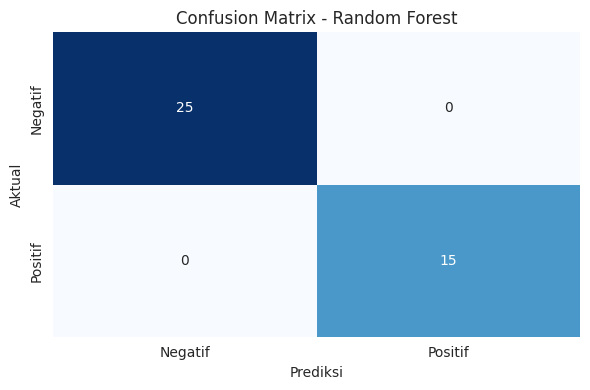

In [332]:
# Inisialisasi dan prediksi ulang dengan Random Forest
best_model = RandomForestClassifier(random_state=4)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negatif', 'Positif'],
            yticklabels=['Negatif', 'Positif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

Berdasarkan hasil yang ditampilkan, model berhasil mengklasifikasikan seluruh data dengan sempurna. Sebanyak 25 data dengan label aktual negatif berhasil diprediksi sebagai negatif, dan 15 data dengan label aktual positif berhasil diprediksi sebagai positif. Tidak terdapat kesalahan klasifikasi, baik berupa false positive maupun false negative. Hal ini menunjukkan bahwa model Random Forest memiliki performa yang sangat baik dalam membedakan antara kelas positif dan negatif, dengan akurasi dan presisi yang sempurna dalam pengujian ini.

### Kurva ROC

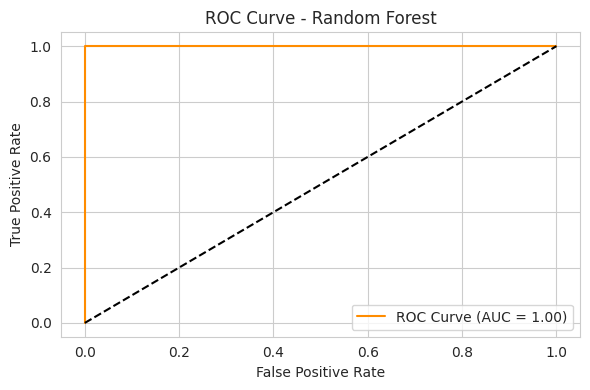

In [333]:
y_prob = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

Kurva ROC (Receiver Operating Characteristic) dari model Random Forest yang digunakan untuk menilai kemampuan model dalam membedakan antara kelas positif dan negatif. Kurva ROC menunjukkan hubungan antara True Positive Rate (TPR) dan False Positive Rate (FPR). Berdasarkan grafik, kurva ROC model berada di sudut kiri atas grafik dan membentuk garis hampir tegak lurus dengan sumbu x, yang menandakan performa klasifikasi yang sangat baik. Nilai AUC (Area Under Curve) sebesar 1.00 mengindikasikan bahwa model memiliki kemampuan sempurna dalam membedakan kedua kelas tanpa kesalahan. Semakin mendekati angka 1.0, semakin tinggi kemampuan diskriminatif model, dan dalam kasus ini, model Random Forest menunjukkan performa optimal dalam klasifikasi.

### Feature Importance

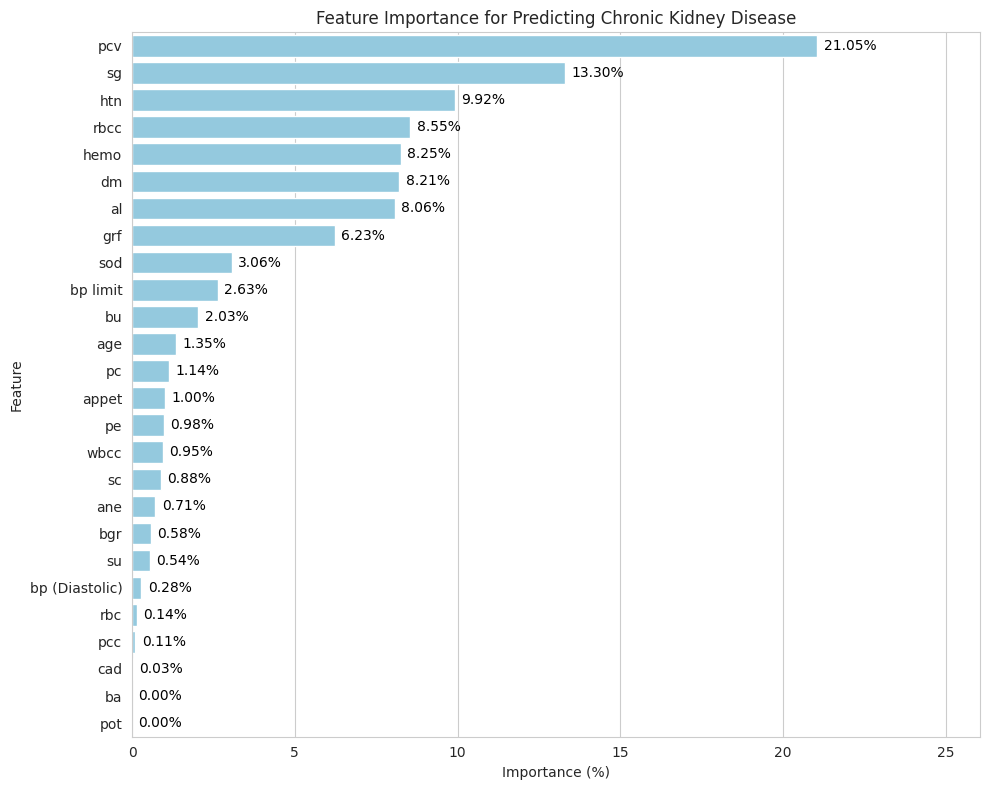

In [334]:
importances = best_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})

# Persentase dan sorting
importance_df["Percentage"] = importance_df["Importance"] * 100
importance_df = importance_df.sort_values(by="Percentage", ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 8))
ax = sns.barplot(data=importance_df, x="Percentage", y="Feature", color='skyblue')

# Tambahkan label tepat di ujung bar
for i, (value, name) in enumerate(zip(importance_df["Percentage"], importance_df["Feature"])):
    ax.text(value + 0.2, i, f'{value:.2f}%', va='center', ha='left', fontsize=10, color='black')

plt.title("Feature Importance for Predicting Chronic Kidney Disease")
plt.xlabel("Importance (%)")
plt.ylabel("Feature")
plt.xlim(0, importance_df["Percentage"].max() + 5)
plt.tight_layout()
plt.show()


Feature importance menggambarkan seberapa besar kontribusi masing-masing fitur (variabel) terhadap performa model dalam melakukan prediksi. Dari grafik, terlihat bahwa fitur pcv (packed cell volume) memiliki pengaruh terbesar, yakni sebesar 21,05%, diikuti oleh sg (specific gravity) dan htn (hypertension) yang masing-masing memberikan kontribusi sebesar 13,30% dan 9,92%. Fitur-fitur lain seperti rbcc (red blood cell count), hemo (hemoglobin), dm (diabetes mellitus), dan al (albumin) juga memberikan kontribusi yang signifikan terhadap model.

Sementara itu, fitur-fitur seperti cad (coronary artery disease), ba (bacteria), dan pot (potassium) memberikan kontribusi yang sangat kecil atau bahkan nol, masing-masing kurang dari 0,1%. Informasi ini sangat berguna dalam proses seleksi fitur karena membantu dalam memfokuskan analisis dan pengambilan keputusan pada fitur-fitur yang paling relevan terhadap diagnosis penyakit ginjal kronis.

## **5. Kesimpulan**

Berdasarkan hasil evaluasi terhadap beberapa model klasifikasi, Random Forest terbukti menjadi model dengan performa terbaik. Model ini berhasil mencapai skor sempurna (1.0) pada seluruh metrik evaluasi, termasuk akurasi, precision, recall, dan F1 score, serta tidak menghasilkan kesalahan klasifikasi sama sekali. Hal ini didukung oleh hasil confusion matrix yang menunjukkan bahwa seluruh data uji berhasil diklasifikasikan dengan benar, tanpa adanya false positive maupun false negative.

Kinerja optimal dari Random Forest juga tercermin pada kurva ROC, di mana model menunjukkan kemampuan diskriminatif yang sangat tinggi dengan nilai AUC sebesar 1.0, yang berarti model mampu membedakan kelas positif dan negatif secara sempurna.

Dari analisis feature importance, diketahui bahwa fitur packed cell volume (pcv) merupakan kontributor paling signifikan terhadap performa model, diikuti oleh specific gravity (sg) dan hypertension (htn). Sebaliknya, fitur seperti coronary artery disease (cad), bacteria (ba), dan potassium (pot) memberikan kontribusi yang sangat kecil atau tidak signifikan. Informasi ini sangat bermanfaat untuk proses seleksi fitur dalam pengembangan model yang lebih efisien dan interpretatif.

Secara keseluruhan, model Random Forest direkomendasikan sebagai pilihan utama untuk tugas klasifikasi penyakit ginjal kronis pada dataset ini, baik dari segi akurasi, kestabilan prediksi, maupun interpretabilitas fitur yang digunakan.